## Fronteira Eficiente de Markowitz

In [1]:
# vamos importar os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

### Vamos usar os dados do Yahoo Finance ou do Google Finance

In [3]:
# download dos dados pelo Yahoo Finance!

start = datetime(2019, 1, 1)
# end = datetime(2018, 12, 31)
acoes = ['PETR4.SA', 'VALE3.SA', 'MGLU3.SA', 'BIDI4.SA', 'ALPA4.SA']
dados = web.get_data_yahoo(acoes, start)['Adj Close']

In [4]:
# checando os dados
dados.describe()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,BIDI4.SA,ALPA4.SA
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,26.226993,48.081857,34.338782,13.005437,23.204112
std,3.505631,3.903054,11.906610,4.484135,6.837629
min,11.290000,34.099998,19.719969,6.097027,13.866588
25%,25.254534,45.747766,22.183670,9.256202,16.091153
50%,26.508688,48.524197,34.108833,13.713802,22.690001
75%,28.388567,50.682016,44.191818,16.824625,28.103138
max,30.809999,57.360001,58.849998,23.421103,37.911461


In [5]:
dados.tail()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,BIDI4.SA,ALPA4.SA
Date,,,,,
2020-03-24,13.25,37.639999,36.680000,9.89,23.770000
2020-03-25,14.32,40.849998,40.000000,10.12,25.420000
2020-03-26,14.39,42.000000,41.119999,11.84,26.299999
2020-03-27,13.30,40.099998,39.000000,11.33,24.490000
2020-03-30,13.50,41.919998,41.200001,11.08,24.360001


### Calculando os retornos

In [6]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

In [7]:
retorno_diario.tail()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,BIDI4.SA,ALPA4.SA
Date,,,,,
2020-03-24,0.152174,0.103812,0.214168,0.098889,0.021048
2020-03-25,0.080755,0.085282,0.090513,0.023256,0.069415
2020-03-26,0.004888,0.028152,0.028000,0.169961,0.034618
2020-03-27,-0.075747,-0.045238,-0.051556,-0.043074,-0.068821
2020-03-30,0.015038,0.045387,0.056410,-0.022065,-0.005308


### Calculando a covariância

In [9]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

### Criando listas para armanezar as principais variáveis

In [10]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [11]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 100000

np.random.seed(101)

In [12]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [19]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

### Criando o gráfico da fronteira eficiente

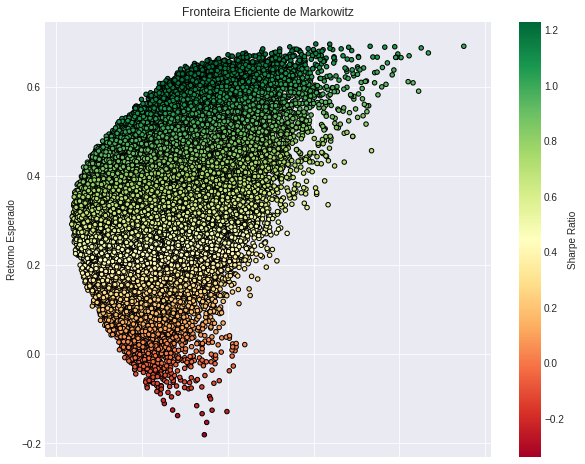

In [22]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [24]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

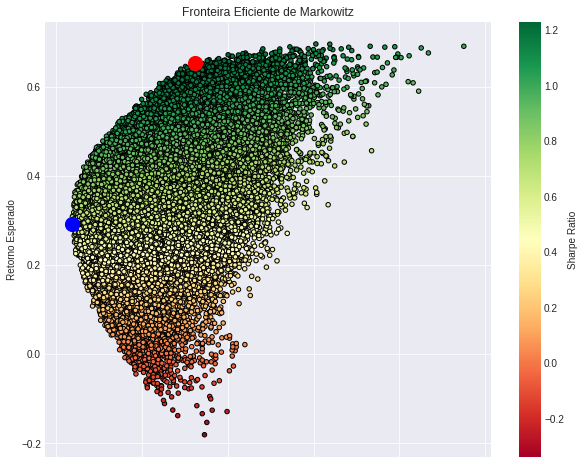

In [25]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [27]:
print("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print('\n')
print("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T)

Essa é a carteira de Mínima Variância: 
                   88633
Retorno        0.291267
Volatilidade   0.459047
Sharpe Ratio   0.634504
PETR4.SA Peso  0.016054
VALE3.SA Peso  0.506217
MGLU3.SA Peso  0.008423
BIDI4.SA Peso  0.002166
ALPA4.SA Peso  0.467141


Essa é a carteira com maior Sharpe Ratio: 
                   41779
Retorno        0.651724
Volatilidade   0.530577
Sharpe Ratio   1.228331
PETR4.SA Peso  0.001320
VALE3.SA Peso  0.013919
MGLU3.SA Peso  0.367908
BIDI4.SA Peso  0.202362
ALPA4.SA Peso  0.414491
